(31250, 3)
[[1722. 1722. 1723.]
 [1440. 1440. 1440.]
 [1059. 1059. 1060.]
 ...
 [3232. 3232. 3233.]
 [2873. 2874. 2874.]
 [2480. 2480. 2481.]]


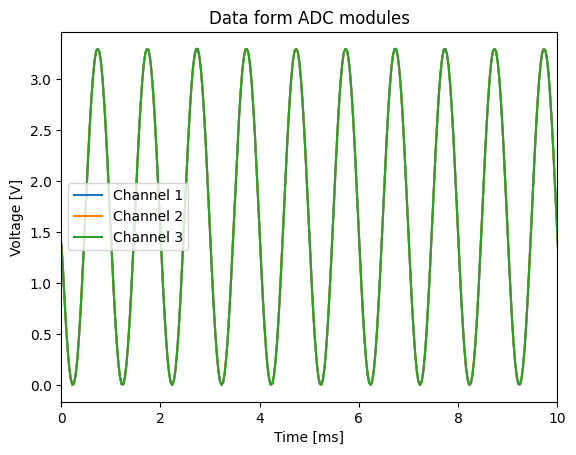

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from raspi_import import raspi_import

channels = 3
#freqIn = 50    #50 Hz
freqIn = 1000   #1 kHz

periodsCount = 10 #How many periods you want to display
periodTime = 1/freqIn  #seconds
rangePeriod = periodsCount * periodTime 

sample_period, data = raspi_import(f'/Users/tordtranum/Desktop/6.semester/Sensorer/Lab/Målinger/test4.bin', channels)

print(data.shape)

time_axis = np.arange(data.shape[0]) * sample_period

print(data)

C = 3.3  # volts per count for MCP3201 with Vref = 3.3V

def converter(data): #Convert from counts to volts
    resulution = 2**12
    Vconv = (C/resulution * data)
    return Vconv



for i in range(channels):
    #plt.plot(time_axis, converter(data[:, i]) + i*C, label=f'Channel {i+1}')
    plt.plot(time_axis, converter(data[:, i]) + 0*C, label=f'Channel {i+1}')
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*1e3:g}"))

# plt.axhline(y=C, linestyle='--', label="Max voltage, 3.3V")
# plt.axhline(y=C/2, linestyle='--', label="Mid voltage, 1.65V", color='red')
# plt.axhline(y=0, linestyle='--', label="Min voltage, 0V")
#plt.plot(time_axis, data[:, 0], label='Channel 1')
plt.xlim(0, rangePeriod)
#plt.plot(time_axis, data[:, 1], label='Channel 2')
#plt.plot(time_axis, data[:, 2], label='Channel 3')
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Data form ADC modules")
plt.legend()
plt.show()

#3 subplots :)


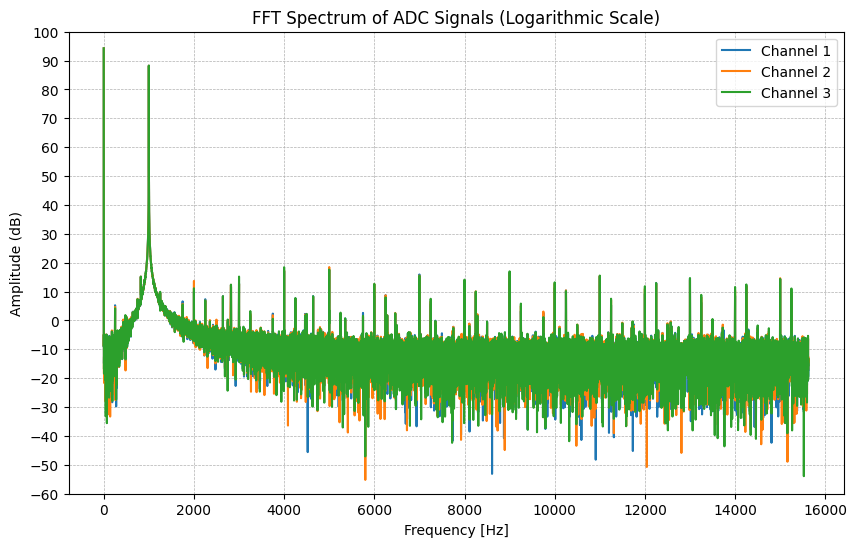

In [7]:
# Beregn FFT for hvert signal
fft_data = []
frequencies = np.fft.fftfreq(data.shape[0], d=sample_period)  # Frekvensaksen
for i in range(channels):
    signal = converter(data[:, i])  # Konverter signalet til volt
    fft_result = np.fft.fft(signal)  # Beregn FFT
    fft_data.append(np.abs(fft_result))  # Ta absoluttverdien for spekteret

# Plott FFT-spekteret med forbedret y-akse
plt.figure(figsize=(10, 6))
for i in range(channels):
    plt.plot(frequencies[:len(frequencies)//2], 
             20 * np.log10(fft_data[i][:len(frequencies)//2] + 1e-10),  # Logaritmisk skala
             label=f'Channel {i+1}')

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude (dB)")
plt.title("FFT Spectrum of ADC Signals (Logarithmic Scale)")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Sett y-aksegrense og merkene
plt.ylim(-60, 100)  # Sett y-aksen fra -100 dB til 0 dB
plt.yticks(np.arange(-60, 110, 10))  # Merk y-aksen med intervaller på 10 dB

plt.show()